In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [26]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [27]:
result = pd.read_csv(r"Substitution/foods_vary_l.csv")

In [28]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,adressa=8_ballot=10000000bs=4,8,70,4,2,0,0,0.0,0.0,0.001594,...,0.203197,1,1,1,1,43,44,44,42,1
1,adressa=8_ballot=10000000bs=4,8,70,4,1,0,0,0.0,0.0,0.001722,...,0.222778,1,1,1,1,43,44,44,42,1
2,adressa=8_ballot=10000000bs=4,8,70,4,0,0,0,0.0,0.0,0.001731,...,0.262814,1,1,1,1,43,44,44,42,1
3,adressa=8_ballot=10000000bs=5,8,70,5,2,0,0,0.0,0.0,0.001738,...,0.206067,1,1,1,1,43,44,44,42,1
4,adressa=8_ballot=10000000bs=5,8,70,5,1,0,0,0.0,0.0,0.001594,...,0.178354,1,1,1,1,43,44,44,42,1
5,adressa=8_ballot=10000000bs=5,8,70,5,0,0,0,0.0,0.0,0.001456,...,0.168293,1,1,1,1,43,44,44,42,1
6,adressa=8_ballot=10000000bs=6,8,70,6,2,0,0,0.0,0.0,0.001402,...,0.179211,1,1,1,1,43,44,44,42,1
7,adressa=8_ballot=10000000bs=6,8,70,6,1,0,0,0.0,0.0,0.001412,...,0.211896,1,1,1,1,43,44,44,42,1
8,adressa=8_ballot=10000000bs=6,8,70,6,0,0,0,0.0,0.0,0.001662,...,0.198128,1,1,1,1,43,44,44,42,1
9,adressa=8_ballot=10000000bs=7,8,70,6,2,0,0,0.0,0.0,0.001642,...,0.189477,1,1,1,1,43,44,44,42,1


In [29]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [30]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,adressa=8_ballot=10000000bs=4,8,70,4,2,0,0,0.0,0.0,0.001594,...,1,1,1,1,43,44,44,42,1,0.0
1,adressa=8_ballot=10000000bs=4,8,70,4,1,0,0,0.0,0.0,0.001722,...,1,1,1,1,43,44,44,42,1,0.0
2,adressa=8_ballot=10000000bs=4,8,70,4,0,0,0,0.0,0.0,0.001731,...,1,1,1,1,43,44,44,42,1,0.0
3,adressa=8_ballot=10000000bs=5,8,70,5,2,0,0,0.0,0.0,0.001738,...,1,1,1,1,43,44,44,42,1,0.0
4,adressa=8_ballot=10000000bs=5,8,70,5,1,0,0,0.0,0.0,0.001594,...,1,1,1,1,43,44,44,42,1,0.0
5,adressa=8_ballot=10000000bs=5,8,70,5,0,0,0,0.0,0.0,0.001456,...,1,1,1,1,43,44,44,42,1,0.0
6,adressa=8_ballot=10000000bs=6,8,70,6,2,0,0,0.0,0.0,0.001402,...,1,1,1,1,43,44,44,42,1,0.0
7,adressa=8_ballot=10000000bs=6,8,70,6,1,0,0,0.0,0.0,0.001412,...,1,1,1,1,43,44,44,42,1,0.0
8,adressa=8_ballot=10000000bs=6,8,70,6,0,0,0,0.0,0.0,0.001662,...,1,1,1,1,43,44,44,42,1,0.0
9,adressa=8_ballot=10000000bs=7,8,70,6,2,0,0,0.0,0.0,0.001642,...,1,1,1,1,43,44,44,42,1,0.0


In [31]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

In [32]:
avg = result.groupby(['Max_Ballot_length'])['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [33]:
avg.to_csv('tempAvgmovie=10.csv')

In [34]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Max_Ballot_length,Number_Of_Candidates,Number_of_voters,Max_Ballot_length.1,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,4,8,70,4,1,0,0,0.0,0.0,0.001682,...,1,1,1,1,43,44,44,42,1,0.0
1,5,8,70,5,1,0,0,0.0,0.0,0.001596,...,1,1,1,1,43,44,44,42,1,0.0
2,6,8,70,6,1,0,0,0.0,0.0,0.001815,...,1,1,1,1,43,44,44,42,1,0.0


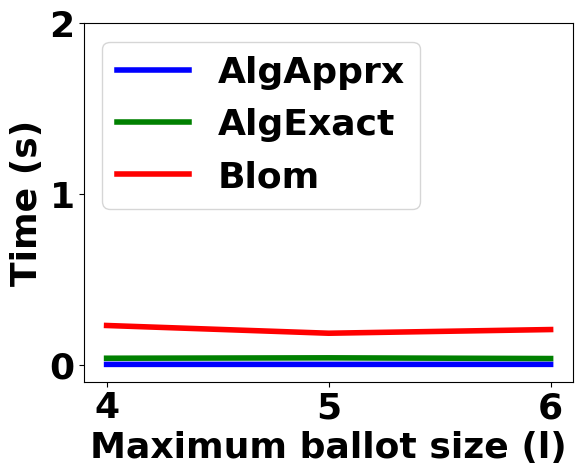

In [35]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Max_Ballot_length'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('Maximum ballot size (l)')
#plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])
plt.ylim(-2*5/100,2)

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper left')
fig.savefig(r"Figures/substitution_food_n=8_vary_l_runtime.pdf",dpi=2024,bbox_inches='tight')